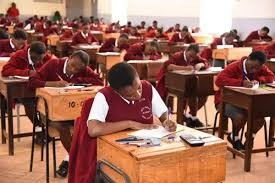

---

\

### **Analysis Summary**

The dataset represents the distribution of students in KCSE 2024 in Kenya, categorized by gender (boys and girls) and their grades. Here's a brief summary of the analysis:

1. **Total Students by Gender**:
   - A pie chart visualizes the overall proportion of boys and girls in the dataset.
   - This shows a near-equal representation of both genders, with slightly more boys than girls.

2. **Key Insights**:
   - **Gender Balance**: Boys and girls have a strong correlation, meaning trends in performance are consistent across genders.
   - **Grade Trends**: The dataset indicates that most students fall in lower grades, especially `D`, `D-`, and `D+`, while very few achieve top grades like `A` and `A-`.

3. **Takeaway**:
   - The strong gender correlation suggests systemic trends rather than gender-specific issues.
   - The visualization highlights areas for targeted intervention, such as improving performance in the lower grades.

The analysis provides a comprehensive view of student performance and gender distribution, which can be used for further planning and decision-making in education policies.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = {
    'Grade': ['A','A-','B+','B','B-','C+','C','D+','D','D-','E'],
    'Number': [1693,7743,19150,43120,75347,99338,111717,118781,128885,153334,151487],
    'Male': [1137,4903,11042, 23339,39950, 48940, 53769, 56175, 60088, 73501, 79306],
    'Female': [556, 2840, 8108, 19781, 35397, 50397, 57948, 62606, 68797, 79832, 72181]
}

df = pd.DataFrame(data)

In [38]:
df.head()

,Grade,Number,Male,Female
0,A,1693,1137,556
1,A-,7743,4903,2840
2,B+,19150,11042,8108
3,B,43120,23339,19781
4,B-,75347,39950,35397


In [39]:
# Summary statistics
print(df.describe())


              Number          Male        Female
count      11.000000     11.000000     11.000000
mean    82781.363636  41104.545455  41676.636364
std     56669.545640  27288.853224  29572.959792
min      1693.000000   1137.000000    556.000000
25%     31135.000000  17190.500000  13944.500000
50%     99338.000000  48940.000000  50397.000000
75%    123833.000000  58131.500000  65701.500000
max    153334.000000  79306.000000  79832.000000


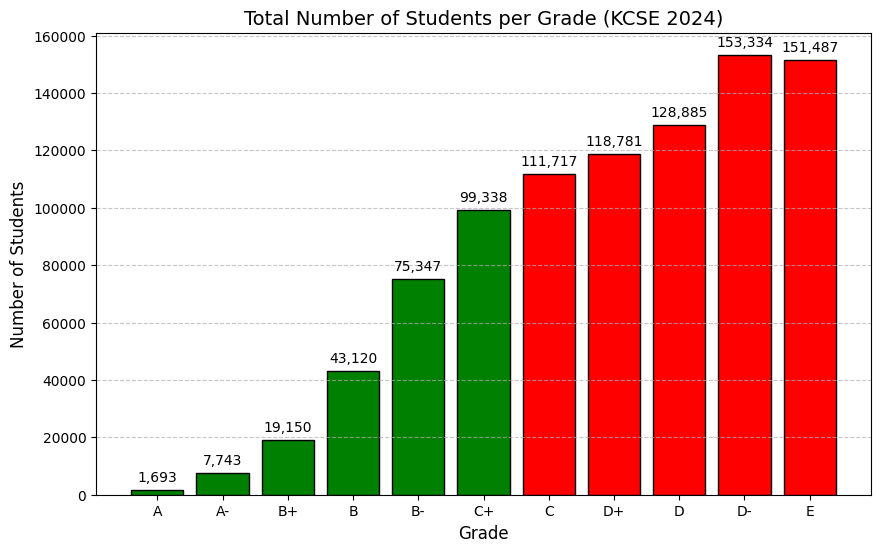

In [40]:
# Highlight grades A to C+ - Direct Entry University
highlight_grades = ['A', 'A-', 'B+', 'B', 'B-', 'C+']
colors = ['green' if grade in highlight_grades else 'red' for grade in df['Grade']]

# Plot total number of students per grade
plt.figure(figsize=(10, 6))
plt.bar(df['Grade'], df['Number'], color=colors, edgecolor='black')
plt.title('Total Number of Students per Grade (KCSE 2024)', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars for all grades
for grade, number in zip(df['Grade'], df['Number']):
    plt.text(grade, number + 3000, f'{number:,}', ha='center', fontsize=10, color='black')

plt.show()


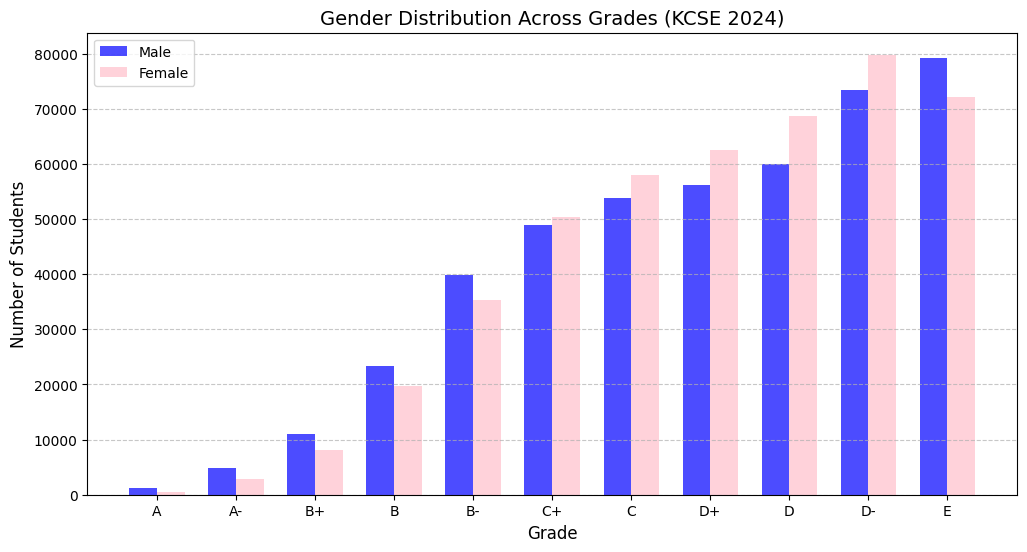

In [41]:
# Bar plot for gender distribution
plt.figure(figsize=(12, 6))
width = 0.35  # Bar width
x = range(len(df['Grade']))

plt.bar(x, df['Male'], width, label='Male', color='blue', alpha=0.7)
plt.bar([i + width for i in x], df['Female'], width, label='Female', color='pink', alpha=0.7)

plt.title('Gender Distribution Across Grades (KCSE 2024)', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks([i + width/2 for i in x], df['Grade'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


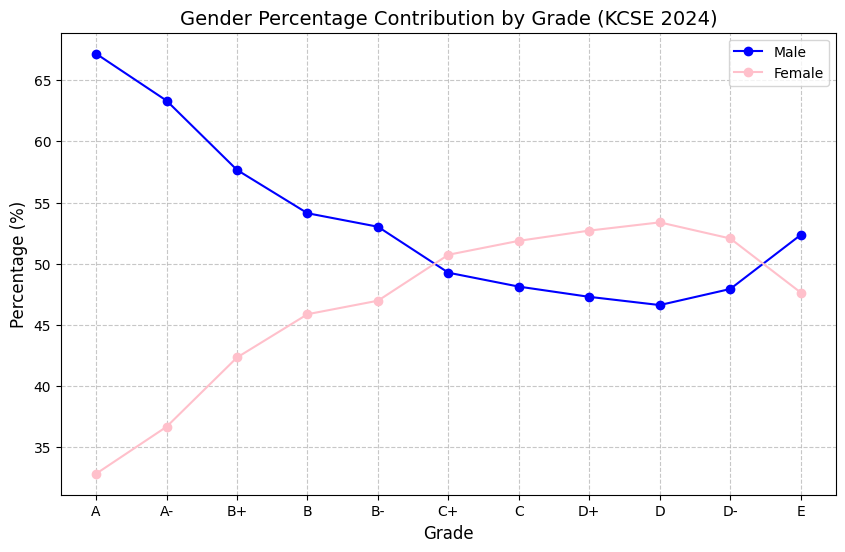

In [42]:
# Calculate percentages
df['Male_Percentage'] = (df['Male'] / df['Number']) * 100
df['Female_Percentage'] = (df['Female'] / df['Number']) * 100

# Line plot for percentage contribution
plt.figure(figsize=(10, 6))
plt.plot(df['Grade'], df['Male_Percentage'], marker='o', label='Male', color='blue')
plt.plot(df['Grade'], df['Female_Percentage'], marker='o', label='Female', color='pink')

plt.title('Gender Percentage Contribution by Grade (KCSE 2024)', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()


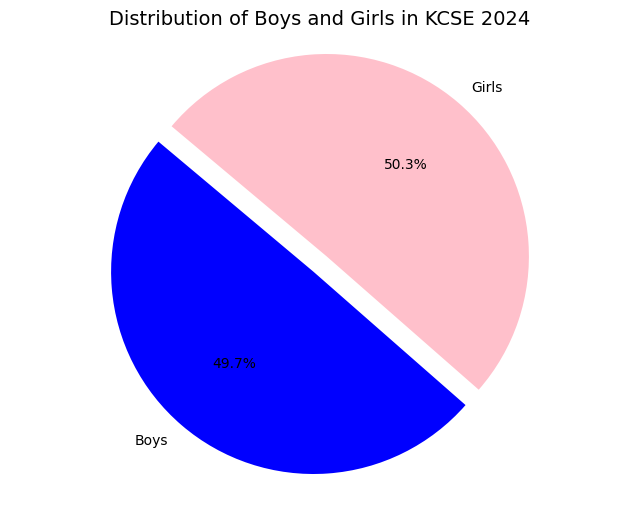

In [43]:
# Total numbers of boys and girls
total_males = df['Male'].sum()
total_females = df['Female'].sum()

# Data for the pie chart
labels = ['Boys', 'Girls']
sizes = [total_males, total_females]
colors = ['blue', 'pink']
explode = (0.1, 0)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Boys and Girls in KCSE 2024', fontsize=14)
plt.axis('equal')
plt.show()


In [44]:
# Find grade with the highest and lowest student count
max_grade = df.loc[df['Number'].idxmax()]
min_grade = df.loc[df['Number'].idxmin()]

print(f"Grade with the highest number of students: {max_grade['Grade']} ({max_grade['Number']} students)")
print(f"Grade with the lowest number of students: {min_grade['Grade']} ({min_grade['Number']} students)")

# Mean and median number of students
mean_students = df['Number'].mean()
median_students = df['Number'].median()
print(f"Mean number of students per grade: {mean_students:.2f}")
print(f"Median number of students per grade: {median_students:.2f}")


Grade with the highest number of students: D- (153334 students)
Grade with the lowest number of students: A (1693 students)
Mean number of students per grade: 82781.36
Median number of students per grade: 99338.00


          Number      Male    Female
Number  1.000000  0.996332  0.996878
Male    0.996332  1.000000  0.986465
Female  0.996878  0.986465  1.000000


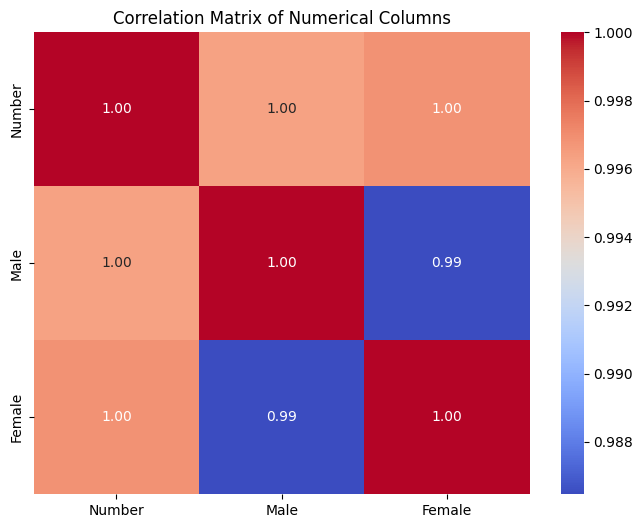

In [45]:
# Calculate the correlation between 'Number', 'Male', and 'Female' columns
correlation_matrix = df[['Number', 'Male', 'Female']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# 1. Gender Parity: Male and female numbers are closely aligned across grades, reflecting balanced gender representation.

# 2. Grade Trends Influence All: The strong correlations indicate that trends (increases or decreases) in overall student performance apply equally to both genders.

# 3. Strategic Planning: Since male and female numbers move in tandem, strategies to improve student outcomes (e.g., teacher training or additional resources) can be designed for all students rather than gender-specific.